# 데이터수집및분석[00] 과제
## 팀원
- 김진아 202004033
- 조경호 201903110
- 홍윤기 201904128
# 목차
1. 분석의 목적
2. 데이터 수집
3. 데이터 전처리
4. 데이터 탐색 및 시각화

# 1. 분석의 목적
### 분석의 목적 
과거 팀원 중 한명이 동사무소에 근무를 한 경험이 있는데, 월말에 부족한 실적,과제를 채우고자 담당자 분과 집중적으로 돌아다닌 것이 생각나 불법 주정차, 음주 단속 같이 매일 반복되는 단속의 경우 특정 시기 ex)음주운전 단속기간 https://m.yonhapnewstv.co.kr/news/MYH20231210000200641 [연말연시 음주운전 집중 단속(11월~12월)] /  https://www.safetynews.co.kr/news/articleView.html?idxno=227731 [음주-고위험운전 집중 단속 (3월 ~4월]에 집중하여 단속을 하는데, 연말,연초 혹은 특정요일에 따른 단속 건수 편차를 확인하고, 시기에 따른 특징이 있는지 분석해보고자 이 데이터를 사용하여 분석하게 되었습니다.

# 2. 데이터 수집
### 데이터 출처 
공공데이터 포털- 대구광역시 서구_불법 주정차 단속현황 [https://www.data.go.kr/data/15062020/fileData.do]

### 수집 방법 
공공데이터 포털을 통한 데이터 수집

### 수집된 데이터의 구조 및 특성 설명 
속성: 위반일자, 위반시간, 위반장소명 <br/>
차수: 3 <br/>
카디널리티: 335,441 <br/>

대구 광역시 서구의 불법주정차 단속일, 불법주정차 단속시간, 불법주정차 단속장소를 포함하고 있는 데이터로, na값이 없고 2015년 1월 5일부부터 2023년11월 23일 까지의 데이터가 모여져있습니다. 데이터를 보면 특정일(연휴, 주말)은 기록되지 않거나, 상대적으로 훨씬 적은 양의 불법주정차 단속기록이 있습니다.

# 3. 데이터 전처리 (필요 시 작성. 데이터가 확보된 경우 작성. 아래의 것을 모두 작성할 필요는 없으며, 데이터에 맞춰서 작성함)

## 결측치 처리

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# 맥북일 경우 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# # 구글 코랩인 경우
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 기본 글꼴 변경
# rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 데이터 가져오기
df = pd.read_csv("/Users/hong-yoonki/Downloads/Daegu2.csv")

결측치를 처리하기위해 na값 혹은 Null값을 찾는다.

In [2]:
df.isna().value_counts()

위반일자   위반시간   위반장소명
False  False  False    335441
Name: count, dtype: int64

In [3]:

df.isnull().value_counts()

위반일자   위반시간   위반장소명
False  False  False    335441
Name: count, dtype: int64

결측치가 존재하지 않습니다.

## 피처 엔지니어링
데이터 타입 변경

In [4]:
# 샘플 확인
df.head()

,위반일자,위반시간,위반장소명
0,2015-01-05,07:31,북비산네거리부근
1,2015-01-05,07:40,서평초등학교부근
2,2015-01-05,07:40,서평초등학교부근
3,2015-01-05,08:24,북비산치안센터부근
4,2015-01-05,09:02,제일효병원부근


In [5]:
# 컬럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335441 entries, 0 to 335440
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   위반일자    335441 non-null  object
 1   위반시간    335441 non-null  object
 2   위반장소명   335441 non-null  object
dtypes: object(3)
memory usage: 7.7+ MB


위반일자와 위반시간을 이용해 위반 순간이라는 컬럼을 만들고 month, year, day 라는 특징을 추출하여 새 컬럼을 생성 후 저장한다.

In [6]:
cols = ['위반일자', '위반시간']
df['위반 순간'] = df[cols].apply(lambda x : ' '.join(x.values.astype(str)), axis = 1)
df['위반 순간'] = pd.to_datetime(df['위반 순간'])
df['month'] = df['위반 순간'].dt.month
df['year'] = df['위반 순간'].dt.year
df['day'] = df['위반 순간'].dt.day
df['weekday'] = df['위반 순간'].dt.weekday
df = df.astype({'weekday': 'category'})

# 컬럼 변경
df['위반일자'] = pd.to_datetime(df['위반일자'])
df['위반시간'] = pd.to_datetime(df['위반시간'])

# 데이터 확인
df.sample(10)

/var/folders/8w/nrt99vrj6zg7wbl3ct3n560c0000gn/T/ipykernel_8908/82088463.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['위반시간'] = pd.to_datetime(df['위반시간'])


,위반일자,위반시간,위반장소명,위반 순간,month,year,day,weekday
163147,2019-02-19,2024-06-06 11:05:00,신떡부근,2019-02-19 11:05:00,2,2019,19,1
286738,2022-09-01,2024-06-06 07:49:00,평리동 국채보상로 부근,2022-09-01 07:49:00,9,2022,1,3
148957,2018-10-08,2024-06-06 07:22:00,내당동 평리로 부근,2018-10-08 07:22:00,10,2018,8,0
140119,2018-06-25,2024-06-06 11:19:00,내당동서문시장,2018-06-25 11:19:00,6,2018,25,0
292215,2022-10-28,2024-06-06 17:23:00,공단주유소 옆,2022-10-28 17:23:00,10,2022,28,4
231295,2021-01-25,2024-06-06 18:08:00,중리동 서대구로25길 부,2021-01-25 18:08:00,1,2021,25,0
111167,2017-11-13,2024-06-06 10:53:00,내당동 평리로 부근,2017-11-13 10:53:00,11,2017,13,0
231005,2021-01-21,2024-06-06 15:28:00,원대동3가 달서로 부근,2021-01-21 15:28:00,1,2021,21,3
41900,2016-05-16,2024-06-06 19:25:00,평리동 북비산로,2016-05-16 19:25:00,5,2016,16,0
264942,2022-01-18,2024-06-06 15:05:00,평리동 638-21 부근,2022-01-18 15:05:00,1,2022,18,1


# 4. 데이터 탐색 및 시각화 (데이터가 확보된 경우 작성. 아래의 것을 모두 작성할 필요는 없으며, 데이터에 맞춰서 작성함)

기술통계 분석

데이터 분포 확인

상관관계 분석

중요 변수 시각화

In [7]:
df.describe()

,위반일자,위반시간,위반 순간,month,year,day
count,335441,335441,335441,335441.000000,335441.000000,335441.000000
mean,2019-06-07 17:22:40.996419584,2024-06-06 13:43:55.489281024,2019-06-08 07:06:36.485700352,6.557466,2018.930026,15.752478
min,2015-01-05 00:00:00,2024-06-06 00:00:00,2015-01-05 07:31:00,1.000000,2015.000000,1.000000
25%,2017-05-11 00:00:00,2024-06-06 10:25:00,2017-05-11 14:29:00,4.000000,2017.000000,8.000000
50%,2019-03-27 00:00:00,2024-06-06 14:32:00,2019-03-27 10:41:00,7.000000,2019.000000,16.000000
75%,2021-08-27 00:00:00,2024-06-06 16:13:00,2021-08-27 15:04:00,10.000000,2021.000000,23.000000
max,2023-11-23 00:00:00,2024-06-06 23:59:00,2023-11-23 23:07:00,12.000000,2023.000000,31.000000
std,NaN,NaN,NaN,3.425385,2.520672,8.717099


## 2015년을 기준으로 분석한 달별 주차단속 시각화

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,위반일자,위반시간,위반장소명,위반 순간,month,year,day,weekday
0,2015-01-05,2024-06-06 07:31:00,북비산네거리부근,2015-01-05 07:31:00,1,2015,5,0
1,2015-01-05,2024-06-06 07:40:00,서평초등학교부근,2015-01-05 07:40:00,1,2015,5,0
2,2015-01-05,2024-06-06 07:40:00,서평초등학교부근,2015-01-05 07:40:00,1,2015,5,0
3,2015-01-05,2024-06-06 08:24:00,북비산치안센터부근,2015-01-05 08:24:00,1,2015,5,0
4,2015-01-05,2024-06-06 09:02:00,제일효병원부근,2015-01-05 09:02:00,1,2015,5,0
...,...,...,...,...,...,...,...,...
31281,2015-12-31,2024-06-06 19:26:00,북부정류장입구,2015-12-31 19:26:00,12,2015,31,3
31282,2015-12-31,2024-06-06 19:26:00,북부정류장입구,2015-12-31 19:26:00,12,2015,31,3
31283,2015-12-31,2024-06-06 19:43:00,북부정류장입구,2015-12-31 19:43:00,12,2015,31,3
31284,2015-12-31,2024-06-06 20:36:00,북비산네거리부근,2015-12-31 20:36:00,12,2015,31,3


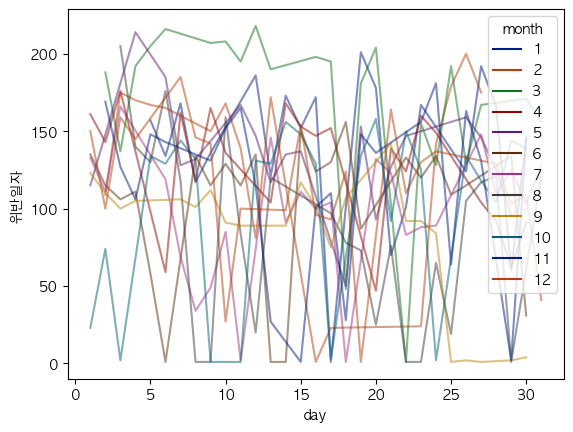

In [8]:
df_2015 = df[df['year'] == 2015]
sns.lineplot(
    df_2015.groupby(['month', 'day']).count(),
    x='day',
    y=df_2015.groupby(['month', 'day']).count()['위반일자'],
    hue='month',
    palette='dark',
    alpha = 0.5,
)
df_2015

이 달별 단속 시각화 그래프는 달마다 날짜수가 다르고 변화의 폭이 너무 크기 때문에 월초와 말의 비교를 하기 어렵다.
따라서 막대 그래프로 다시 비교하기로 한다.

<Axes: xlabel='day'>

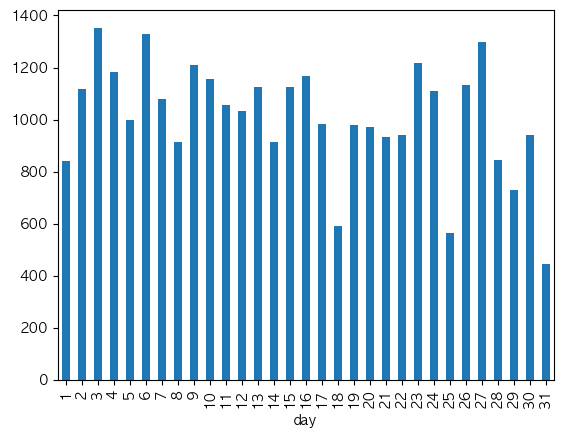

In [9]:
df_2015.day.value_counts().sort_index().plot(kind='bar')

막대 그래프로 시각화한 결과 월중반보다는 월초와 월말에 단속수가 미미하지만 많은 것으로 드러난다.
이것을 "월초반,월중반,월말" 이렇게 3단계로 비교해보기로 한다.

# 2015년을 기준으로 분석한 월초,월중반,월말의 비교

<Axes: >

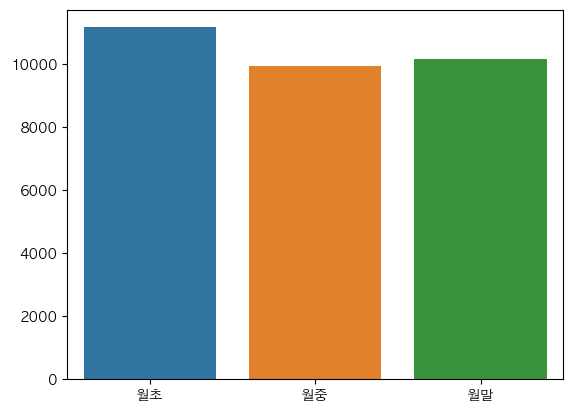

In [10]:
tmp=[
    df_2015.day.value_counts().sort_index()[:10].sum(),
    df_2015.day.value_counts().sort_index()[10:20].sum(),
    df_2015.day.value_counts().sort_index()[20:].sum(),
    ]
tmp = pd.DataFrame(tmp)
tmp.rename({0: '월초', 1: '월중', 2:'월말'}, inplace=True)
tmp = tmp.T
sns.barplot(tmp)

결과를 보면
월초반 > 월말 > 월중반
순으로 단속결과가 많은것으로 나타난다.
2015년 뿐만 아니라 다른 년도의 기록도 함께 비교해본다
# (2015~2023) 년도별 불법 주정차 단속의 합

<Axes: xlabel='year'>

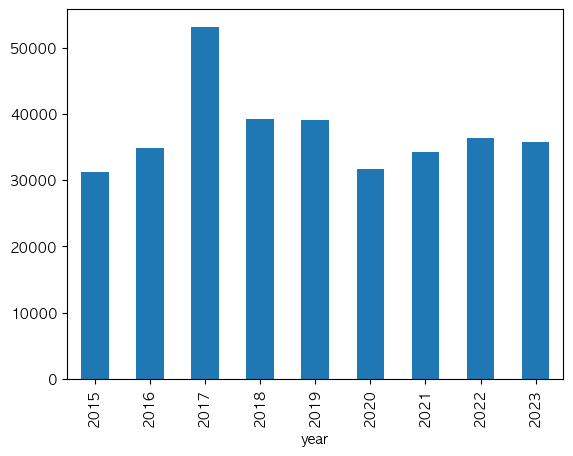

In [11]:
df['year'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='month'>

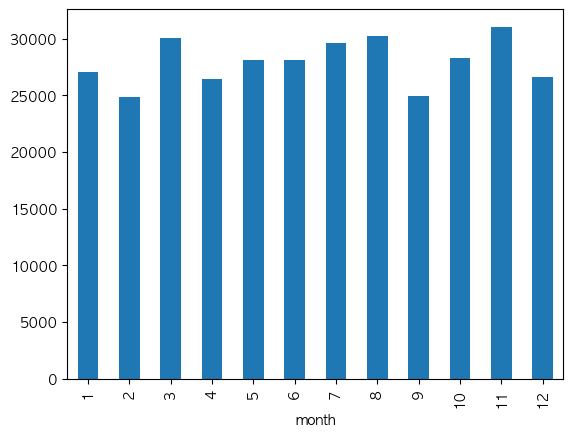

In [12]:
df.month.value_counts().sort_index().plot(kind='bar')

년도별 불법주차 단속의 결과를 분석해보자면 먼저 2017년은 비정상적으로 높은 것으로 나타난다. 그 이유를 분석하고자 조사를 해본결과 2017년에는 연초와 연말에 휴일이 길어서 그렇다는 예상을 해본다. 그리고 2020년에는 급격하게 주차단속의 횟수가 줄었는데 이것은 2020년도부터 코로나 바이러스가 유행하기 시작하여 시민들이 외출을 자제하여서 나온 결과라고 추측할 수 있다.

근거 기사 : (https://www.imaeil.com/page/view/2020032415282665165)
또 다른 근거는 다음 그래프로 볼 수 있다.

<Axes: xlabel='위반일자', ylabel='위반시간'>

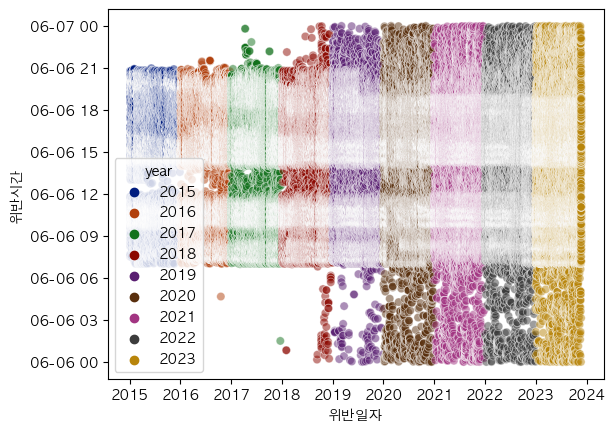

In [13]:
# 24시 기준 위반시간 산포도
sns.scatterplot(
    df,
    x='위반일자',
    y=df.위반시간,
    hue='year',
    alpha=0.5,
    palette='dark'
)

이 그래프로 보면 2019년 이전에는 새벽에 불법주차 단속을 하는 일이 거의 없었는데 2019년 이후로부터 점진적으로 단속을 시작하여서 2020년부터는 주자단속의 횟수가 늘었다고 볼 수 있다.

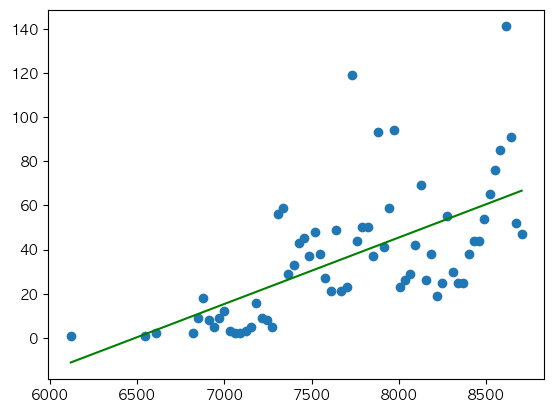

In [15]:

from sklearn.linear_model import LinearRegression
from datetime import datetime

# 선형회귀 사용
model = LinearRegression()
df_reg = df[(df['위반시간'].dt.hour >= 0)&(df['위반시간'].dt.hour <6)].groupby(['year', 'month']).count().reset_index()[['year', 'month', '위반시간']]
df_reg = df_reg.rename(columns={'위반시간': '위반횟수'})

# X, y set 전처리
base_date = datetime(2000, 1, 1)
X = df_reg[['year', 'month']].to_numpy()
X_months = np.array([(datetime(year, month, 1) - base_date).days for year, month in X])
y = df_reg['위반횟수'].to_numpy()

# 모델 fit
model.fit(X=X_months.reshape(-1, 1), y=y)

# 그래프 그리기
data = X_months.reshape(-1, 1)
pred = model.predict(data)
plt.scatter(X_months, y)
plt.plot(X_months, pred, color='green')
plt.show()

월별 단속건수를 회귀분석을 통해 정확히 그래프가 우상향하여 새벽단속이 늘어났다고 볼 수 있다.

따라서 비정상적으로 높게 측정된 2017년을 제외하고 2015년~2019년까지의 4년동안의 주차단속의 결과를 비교해보려 한다.


# (2017년 제외)2015~2019년도의 주차단속 비교

<Axes: xlabel='weekday'>

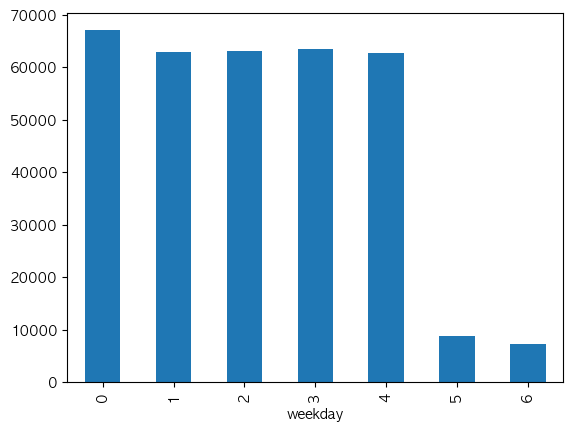

In [16]:
df.weekday.value_counts().sort_index().plot(kind='bar')

차이는 미미하지만 전체적으로 보면 월요일에 단속 건수가 가장 많은 것을 볼 수 있다.

<Axes: >

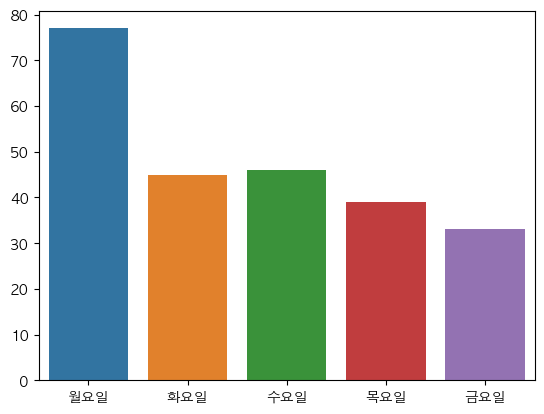

In [17]:
def get_top5(x) :
    return (
            x.groupby('위반일자', observed=True)
        .count()
        .sort_values('day', ascending=False)[:5]
        .unstack()['day']
        .reset_index().drop(0, axis=1)['위반일자']
        .dt.weekday
           )
years = [2015, 2016, 2018, 2019]
df_new = df[df['year'].isin(years)]
df_new = df_new.groupby(['year', 'month'], observed=True).apply(get_top5).reset_index()
# sns.countplot(df_new.sum(), x=[0,1,2,3,4])
# df_new = pd.DataFrame(df_new.sum()).T.drop(['year', 'month'], axis=1)
# df_new.rename(columns={0: '월', 1:'화', 2:'수', 3:'목', 4:'금'}, inplace=True)
# df_new.T.plot(kind='bar')
dict(df_new[0].value_counts()).keys()
df_new_columns = [0,1,2,3,4]
v = [0, 0, 0, 0, 0]
for i in df_new_columns:
    df_dic = dict(df_new[i].value_counts())
    for d in df_dic.keys():
        # print(d, df_dic[d])
        v[d] += df_dic[d]
dict_top5 = []
v = [v]
df_top5 = pd.DataFrame(v, columns=['월요일', '화요일', '수요일', '목요일', '금요일'])
sns.barplot(df_top5)

4개년 기준으로 보았을 때(2017년은 타 연도와 많은 차이가 있기에 15년을 시작으로 16, 18, 19년간 top 5(데이터가 많은 날)를 분석하여 통계를 구했을 때 확실히 월요일에 많은 불법주정차, 혹은 단속이 있으며 월초와 월말에 더 많은 데이터가 쌓이는 것을 확인할 수 있다.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='day'>

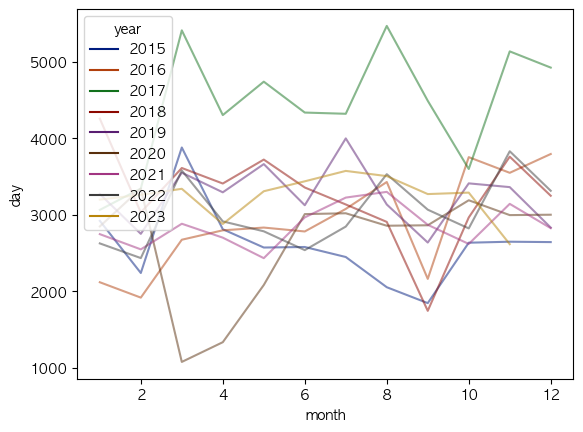

In [18]:
# lineplot: 각 연도의 월별 위반 건수
sns.lineplot(
    df.groupby(['year', 'month']).count(),
    x='month',
    y=df.groupby(['year', 'month']).count().day,
    hue='year',
    palette='dark',
    alpha=0.5
)

월별 총합을 보았을 때 7, 8월이 상대적으로 높은 이유는 휴가로 인한 외부인들의 유입 + 특정 장소(관광지, 명소) 등에 사람들이 몰리며 불법 주정차가 많아지고 9월에는 외부인들이 빠져나가고, 추석 휴가 기간이 있어 설날이 있는 2월과 비슷한 데이터를 가진다는 가설을 세우고 싶다.

결론적으로 현재까지 분석한 데이터를 통해 단속 건수를 분석해본 결과 대체적으로 월 중순보다는 월초, 월말에 더 많은 단속을, 일 주일에서는 월요일에 가장 많은 단속을 하는 것으로 나타났다. 또한 월별 top5를 분석해볼 결과 월요일이 다른 요일보다 훨씬 많은 것으로 나타났다. 연휴가 포함된 2월과 9월은 갓길 주차가 허용되는 빨간 날이기 때문에 월별 단속 총합에서 다른 월과 비교해서 적은 통계량을 보여준다.

2023년 12월 데이터가 비어있기때문에 회귀분석을 통해 12월 한 달간 총 단속건수를 예측해보려고한다.

예측에 사용한 방법은 
1. 평균
2. 회귀분석
이다.

In [19]:
# df['위반일자'] = pd.to_datetime(df['위반일자'])
date_start_2022 = '2022-11-24'
date_end_2022 = '2022-12-31'
original_date = (df['위반일자'] >= date_start_2022) & (df['위반일자'] <= date_end_2022)
sample_data = df[original_date]
sample_data['위반일자'] = sample_data['위반일자'].dt.date
sample_data_grouped = sample_data.groupby('위반일자').size() # size로 일별 계산
# 평균 값 계산
mean_sample_data = sample_data_grouped.mean() 
# 이후 소수점 버리기
floor_mean_sample_data = int(mean_sample_data) #  평균 건수 109건
# 넣어줄 일자 정해주기
date_start_2023 = '2023-11-24'
date_end_2023 = '2023-12-31'

# 변경할 날짜 묶어주기
to_change_date = pd.date_range(start=date_start_2023, end=date_end_2023)
append_data = pd.DataFrame(to_change_date, columns=['위반일자'])
append_data['위반시간'] = ['00:00'] * len(append_data) #날짜만큼 위반시간, 위반 장소 추가
append_data['위반장소명'] = ['정보없음'] * len(append_data)
# 평균만큼 열 만들어주기
append_data = append_data.loc[append_data.index.repeat(floor_mean_sample_data)].reset_index(drop=True) # repeat으로 들어가기 때문에 두번 입력하면 두배로 들어갑니다 주의!
# 데이터 합쳐주기
fixed_data = pd.concat([df, append_data], ignore_index=True)
grouped_fixed_data = fixed_data.groupby(fixed_data['위반일자'].dt.date).size()
grouped_fixed_data.tail() # 여기까지 하면  12월 31일까지 데이터 완성
# 이후 그래프를 그려보면 

/var/folders/8w/nrt99vrj6zg7wbl3ct3n560c0000gn/T/ipykernel_8908/2056189939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['위반일자'] = sample_data['위반일자'].dt.date


위반일자
2023-12-27    109
2023-12-28    109
2023-12-29    109
2023-12-30    109
2023-12-31    109
dtype: int64

<Axes: xlabel='year'>

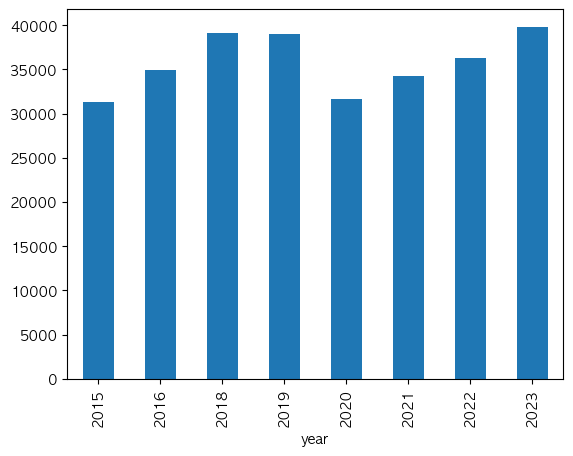

In [20]:
#연도로 묶어주기
fixed_df = fixed_data
fixed_df['위반일자'] = pd.to_datetime(fixed_df['위반일자'])
fixed_df['year'] =fixed_df['위반일자'].dt.year
#2017년 데이터 제외
# fixed_df['year'].value_counts().sort_index().plot(kind='bar') #  전체 그래프

fixed_data_except_2017 = fixed_df[fixed_df['year'] != 2017]
fixed_data_except_2017['year'].value_counts().sort_index().plot(kind='bar') #연도별 그래프 를 하면

2017년 데이터가 튀고, 2023년의 11월 24일부터 12월 31일 까지의 데이터가 없으므로 이를 작년 11월 24부터 12월 31일까지의 평균값을 통해 2023년 데이터를 추가하여 그래프를 그려봤을 때 그래프가 우상향 하는 것으로 보여진다.

이를 정확한 값을 위해 회귀분석을 시행하면

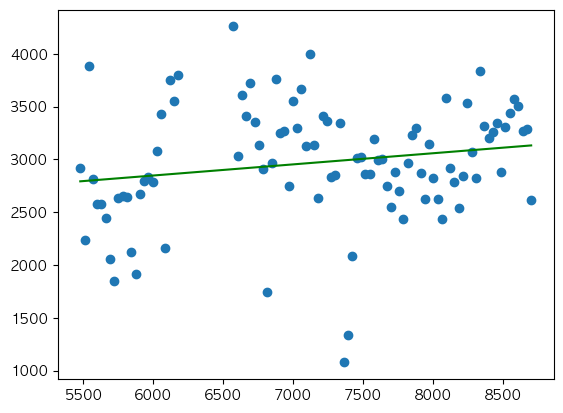

[3135.00356038]


In [24]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

# 선형회귀 사용
model = LinearRegression()

# 데이터 전처리

df_reg = df[df['year']!=2017].groupby(['year', 'month']).count().reset_index()[['year', 'month', '위반시간']]
df_reg = df_reg.rename(columns={'위반시간': '위반횟수'})

# X, y set 전처리
base_date = datetime(2000, 1, 1)
X = df_reg[['year', 'month']].to_numpy()
X_months = np.array([(datetime(year, month, 1) - base_date).days for year, month in X])
y = df_reg['위반횟수'].to_numpy()

# 모델 fit
model.fit(X=X_months.reshape(-1, 1), y=y)

# 그래프 그리기
data = X_months.reshape(-1, 1)
pred = model.predict(data)
plt.scatter(X_months, y)
plt.plot(X_months, pred, color='green')
plt.show()

# 2023-12 예측
X_test = np.array([[2023, 12]])
X_test_months = np.array([(datetime(year, month, 1) - base_date).days for year, month in X_test]).reshape(-1, 1)
pred = model.predict(X_test_months)

# 결과
print(pred)

이처럼 다시 우상향하고 있음을 확인 할 수 있다. 

결론을 내린다면 월 중순보다는 월초, 월말에 더 많은 단속을, 또한 월요일에 가장 많은 단속을 한다고 볼 수 있다. 또한 회귀분석을 통해 분석한 결과 날이 갈수록 단속 건수는 더욱 올라간다고 볼 수 있겠다.